## Bike Sharing


### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## Data Business Understanding

**Context**

Bike-sharing systems represent an evolution of traditional bike rental services, where the entire process from membership and payment to bike checkout and return is fully automated. These systems allow users to rent a bike at one station and return it to another, making urban mobility more flexible and accessible. Today, more than 500 bike-sharing programs operate worldwide, collectively managing over half a million bicycles. Their rapid growth reflects increasing public interest in sustainable transportation, urban traffic reduction, and eco-friendly mobility solutions.

Beyond their practical value, bike-sharing systems generate rich and granular real-world data. Unlike other transportation modes such as buses or subways, bike-sharing records typically include trip duration, departure time, arrival time, and usage volume at an hourly level. This transforms bike-sharing networks into a large-scale virtual sensor system capable of capturing human mobility patterns across a city. As a result, analyzing bike-sharing data provides valuable insights for urban planning, operational efficiency, and environmental forecasting.

**Problem Statement**

The operational challenge faced by bike-sharing providers is efficiently allocating bikes across stations to meet real-time demand. If demand is underestimated, users may find no available bikes; if overestimated, excess inventory increases operational cost.

This project aims to address the following problem:

How can we accurately predict the total number of bike rentals per hour (cnt) based on time-related features, weather conditions, and environmental factors, so that operators can optimize bike availability and resource planning?

**Objectives**

- Build a regression model capable of predicting hourly bike rental counts (cnt).
- Reduce prediction errors to improve operational decision-making, specifically by minimizing RMSE and MAE.
- Identify which factors (time, seasonality, weather) most influence bike rental demand

**Metrics**

- RMSE (Root Mean Squared Error): Measures the magnitude of large errors; used as the main evaluation metric.
- MAE (Mean Absolute Error): Indicates the average absolute difference between predicted and actual rental counts.
- R² (Coefficient of Determination): Measures how well the model explains variance in the target variable.

## Data Understanding

**Data Source**

Primary real-world source

[Capital Bikeshare System Data (Washington D.C.)](https://capitalbikeshare.com/system-data)

Processed machine learning dataset

[Bike Sharing Dataset — UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

**Features**
-	dteday: date
-	season: season (1: winter, 2: spring, 3: summer, 4: fall)
-	hr: hour (0 to 23)
-	holiday: holiday or not
-	temp: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
-	atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
-	hum: normalized humidity. The values are divided into 100 (max)
-	casual: count of casual users
-	registered: count of registered users
-	cnt: count of total rental bikes including both casual and registered
-	weathersit:
    -	1: Clear, Few clouds, Partly cloudy, Partly cloudy
    -	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    -	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    -	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Data Description**

| Feature        | Type              | Description                                                                                                                                                                                                                                                                                                            |
| -------------- | ----------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **dteday**     | Date              | Calendar date when the rental record was captured.                                                                                                                                                                                                                                                                     |
| **season**     | Categorical (1–4) | Season of the year (1: Winter, 2: Spring, 3: Summer, 4: Fall).                                                                                                                                                                                                                                                         |
| **hr**         | Integer (0–23)    | Hour of the day, representing hourly rental cycles.                                                                                                                                                                                                                                                                    |
| **holiday**    | Binary (0/1)      | Indicates whether the day is a public holiday.                                                                                                                                                                                                                                                                         |
| **temp**       | Numeric (0–1)     | Normalized actual temperature in Celsius. The original values were scaled using **(t - Tmin) / (Tmax - Tmin)**, with **Tmin = -8°C** and **Tmax = 39°C** (based on UCI documentation).                                                                                                                                 |
| **atemp**      | Numeric (0–1)     | Normalized perceived (“feels-like”) temperature in Celsius, scaled using **Tmin = -16°C** and **Tmax = 50°C**.                                                                                                                                                                                                         |
| **hum**        | Numeric (0–1)     | Normalized humidity level. Values are divided by 100.                                                                                                                                                                                                                                                                  |
| **casual**     | Integer           | Number of rentals by casual users (non-registered).                                                                                                                                                                                                                                                                    |
| **registered** | Integer           | Number of rentals by registered members.                                                                                                                                                                                                                                                                               |
| **cnt**        | Integer           | Total number of rentals (target variable), equal to casual + registered.                                                                                                                                                                                                                                               |
| **weathersit** | Categorical (1–4) | Weather situation category: <br> **1:** Clear, Few clouds, Partly cloudy <br> **2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds <br> **3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> **4:** Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog |



**Initial Observations & Analytical Questions**

Before performing modeling, several key analytical questions guide the exploratory phase:
1. How does hourly demand(cnt) vary throughout the day?
2. How do weather conditions affect rental volume?
3. Does rental demand differ across seasons?
4. How strongly temperature and humidity correlated with rental counts?
5. Are there any anomalies or outliers that need to be addresses during preprocessing?

In [49]:
# Load data
import pandas as pd

df = pd.read_csv("data_bike_sharing.csv")

In [50]:
# Check for missing value
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
# Check duplicated rows
df.duplicated().sum()

np.int64(0)

In [52]:
# Check normalized variables value
df[["temp", "atemp", "hum"]].describe()

,temp,atemp,hum
count,12165.000000,12165.000000,12165.000000
mean,0.498185,0.476996,0.625451
std,0.192492,0.171857,0.192102
min,0.020000,0.000000,0.000000
25%,0.340000,0.333300,0.470000
50%,0.500000,0.484800,0.620000
75%,0.660000,0.621200,0.780000
max,1.000000,1.000000,1.000000


In [53]:
# Check target variable
df["cnt"].describe()

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

<Axes: >

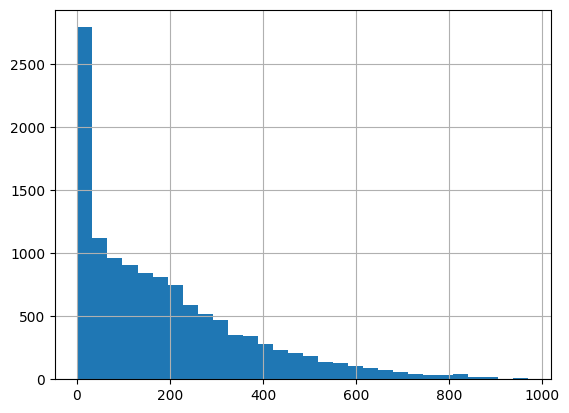

In [54]:
df["cnt"].hist(bins=30)


**Data quality Check**
- No missing value
- No duplicated rows(dteday, hr)
- Value range of normalized variables(temp, atemp, hum) align with the UCI dataset specification
- Target variable contains no negative or unrealistic values

The target variable (cnt) displays a right-skewed distribution, which is typical for hourly rental data. Most hours have relatively low rental activity, while peak commuting hours produce higher values. This skewness is natural and does not require correction at this stage, since the modeling phase will include tree-based algorithms that are robust to non-normal target distributions.

## Exploratory Data Analysis


The dteday column is initially loaded as a string (object) type.  
To properly extract calendar-based features such as day of week and month, it is first converted into a datetime type:

In [55]:
df["dteday"] = pd.to_datetime(df["dteday"])


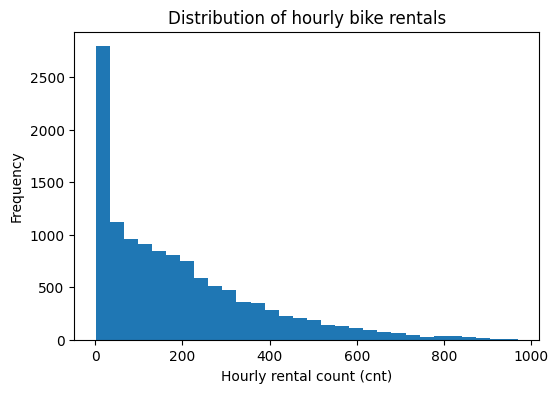

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["cnt"], bins=30)
plt.xlabel("Hourly rental count (cnt)")
plt.ylabel("Frequency")
plt.title("Distribution of hourly bike rentals")
plt.show()

df["cnt"].describe()


**Distribution of Target Variable (cnt)**

The cnt column represents the total number of bike rentals per hour.
The histogram shows that the distribution is right-skewed:  
most hours have relatively low or moderate rental counts, while only a few hours 
reach very high demand.

This pattern is reasonable for hourly usage data and does not indicate a data quality problem.

**Implication for preprocessing and modeling**

Because the skew is not extreme and tree-based models can handle non-normal 
targets quite well, I decide to keep cnt in its original scale (no log-transform).
However, the presence of high-demand peak hours makes it important for the model 
to capture time-related patterns (e.g. peak commuting hours), which will be handled 
in the feature engineering step.


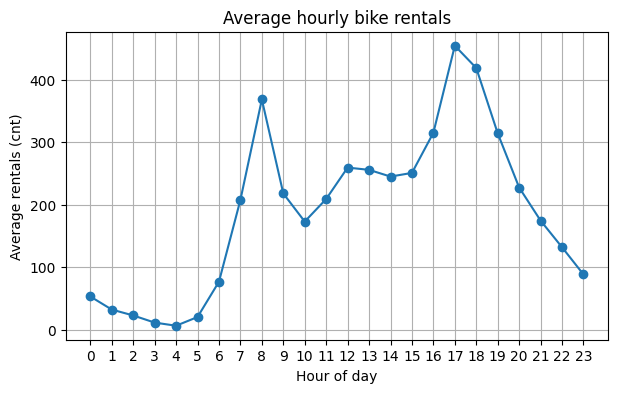

In [57]:
hourly_cnt = df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(7,4))
plt.plot(hourly_cnt.index, hourly_cnt.values, marker="o")
plt.xticks(range(0,24))
plt.xlabel("Hour of day")
plt.ylabel("Average rentals (cnt)")
plt.title("Average hourly bike rentals")
plt.grid(True)
plt.show()

Average Rentals by Hour of Day

The hr column (0–23) represents the hour of the day.  
The plot of average rentals by hour shows very clear daily patterns:

- very low demand at night (around 0–5),
- a strong morning peak (around 7–9),
- moderate usage during midday,
- the highest peak in the late afternoon (around 16–18),
- and a gradual decrease after the evening.

This confirms that **time-of-day is one of the most important drivers of demand**.

**Implication for preprocessing and modeling**

The pattern is not linear: hour 23 and hour 0 are numerically far apart but
very close in time.  
To represent this circular structure in the model, the hr feature will later be
transformed into cyclical features (hr_sin and hr_cos) during preprocessing,
so that the model can better capture daily periodic patterns.

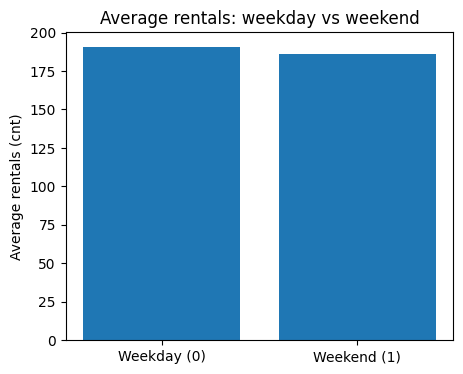

is_weekend
0    190.642758
1    185.846220
Name: cnt, dtype: float64

In [58]:
df["day_of_week"] = df["dteday"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

weekday_weekend_cnt = df.groupby("is_weekend")["cnt"].mean()

labels = ["Weekday (0)", "Weekend (1)"]

plt.figure(figsize=(5,4))
plt.bar(labels, weekday_weekend_cnt.values)
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals: weekday vs weekend")
plt.show()

weekday_weekend_cnt


**Weekday vs Weekend Analysis**

Using the dteday column (converted into datetime during EDA), I extract the day of week
and identify whether each observation falls on a weekday or weekend:

- Weekdays  : Monday–Friday (is_weekend = 0)  
- Weekends  : Saturday–Sunday (is_weekend = 1)

The comparison of average rental counts shows that weekdays and weekends have
similar overall demand levels:

- **Weekday average:** ~190 rentals/hour  
- **Weekend average:** ~185 rentals/hour  

Although the difference is not dramatic, this suggests that bike usage behavior
does change slightly depending on the type of day.  
Weekdays tend to capture commuting patterns, while weekends reflect more flexible
leisure-related trips.

**Implication for preprocessing**

Since there is still a noticeable behavioural difference (even if small),
is_weekend will be kept as a binary feature during preprocessing.  
Capturing this distinction may help the model understand subtle differences in
usage patterns between working days and non-working days.

C:\Users\nadiaz\AppData\Local\Temp\ipykernel_27056\1988557587.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cnt = df.groupby("temp_bin")["cnt"].mean()


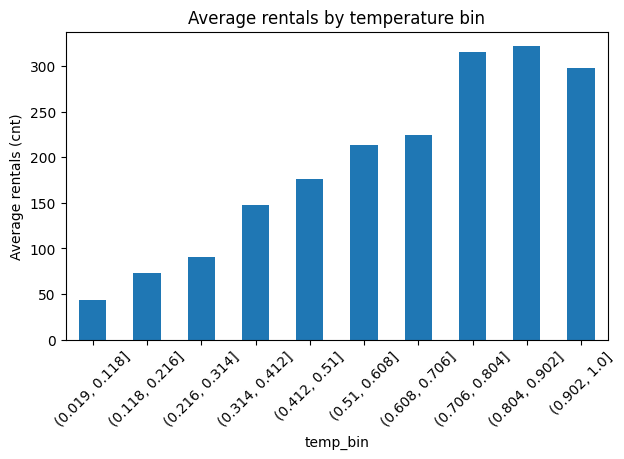

In [59]:
df["temp_bin"] = pd.cut(df["temp"], bins=10)

temp_cnt = df.groupby("temp_bin")["cnt"].mean()

plt.figure(figsize=(7,4))
temp_cnt.plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals by temperature bin")
plt.show()


**Temperature and Bike Rentals**

To explore how weather affects bike demand, I grouped the normalized temperature
(temp, which ranges from 0 to 1) into 10 bins and calculated the
average number of rentals in each bin.

The pattern is very clear:

- Very low temperatures correspond to very low rental counts.
- As temperature increases, the average number of rentals also increases sharply.
- The highest rental counts occur in the warmest temperature ranges 
  (approximately 0.70–0.85 on the normalized scale).
- At the extreme high end (0.90+), demand slightly decreases again, which is
  reasonable because temperatures may become uncomfortable for cycling.

This trend reflects real-world behaviour: people ride bikes much more when the weather
feels comfortable.

**Implication for preprocessing**

The strong monotonic trend indicates that the raw temp feature already carries
useful information in its continuous form.  
Therefore, temp (and its related variable atemp) will be kept as continuous numerical
features during preprocessing and will be passed directly into the model without
discretisation or transformation.

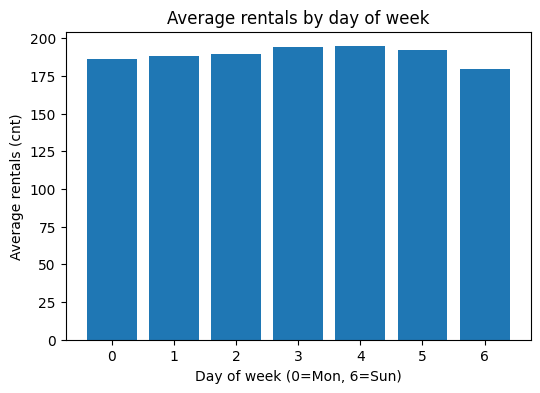

day_of_week
0    186.169591
1    188.129350
2    189.889203
3    194.282373
4    194.651445
5    191.994875
6    179.579803
Name: cnt, dtype: float64

In [60]:
# Average rentals per day of week (0=Mon, 6=Sun)
dow_cnt = df.groupby("day_of_week")["cnt"].mean()

plt.figure(figsize=(6,4))
plt.bar(dow_cnt.index, dow_cnt.values)
plt.xlabel("Day of week (0=Mon, 6=Sun)")
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals by day of week")
plt.show()

dow_cnt


**Rentals by Day of Week**

Using the day_of_week feature (0 = Monday, ..., 6 = Sunday),  
I compare the average number of rentals for each day.

The bar plot shows that:

- Monday–Saturday (0–5) are quite similar, with average rentals around 186–195.
- Sunday (6) has the lowest average (~180), slightly below the other days.

Overall, there is **no extreme difference** between individual weekdays,
but there is a small drop on Sunday, which may reflect reduced commuting
and more flexible leisure activities.

**Implication for preprocessing and modeling**

Because the variation across individual weekdays is relatively small,
using a full one-hot encoding for each day of week may not provide a
strong additional benefit.  
Instead, the simpler is_weekend feature is likely sufficient to capture
the main behavioural difference between working days and weekends.

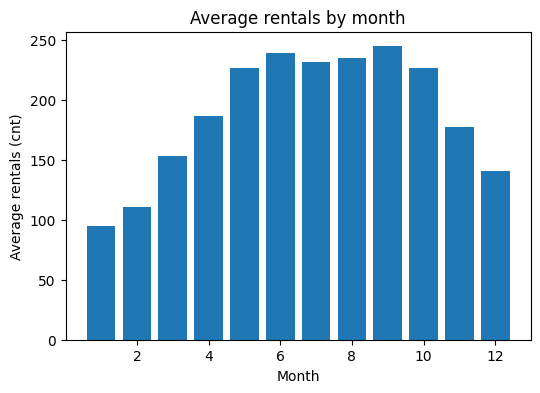

month
1      94.567298
2     110.860393
3     152.720545
4     186.204614
5     226.081671
6     239.202783
7     231.188091
8     234.478261
9     244.444008
10    226.643221
11    177.561562
12    140.440744
Name: cnt, dtype: float64

In [61]:
# Make sure month exists
if "month" not in df.columns:
    df["month"] = df["dteday"].dt.month

month_cnt = df.groupby("month")["cnt"].mean()

plt.figure(figsize=(6,4))
plt.bar(month_cnt.index, month_cnt.values)
plt.xlabel("Month")
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals by month")
plt.show()

month_cnt


**Rentals by Month (Seasonal Pattern)**

Next, I analyse average rentals per month to understand seasonal effects.

The results show a clear pattern:

- Demand is lowest in January and February (~95–110 rentals).
- Rentals then increase steadily from March to June.
- The peak occurs around September (month 9) with ~244 average rentals.
- After September, demand gradually decreases again towards the end of the year,
  especially in November and December.

This indicates a **strong seasonal pattern**: bike usage increases during
warmer months and decreases during colder periods.

**Implication for preprocessing and modeling**

Because seasonality clearly affects demand, calendar-related features such as
month and season are useful to keep in the model.  
They allow the model to differentiate between low-demand winter months and
high-demand summer/fall months.

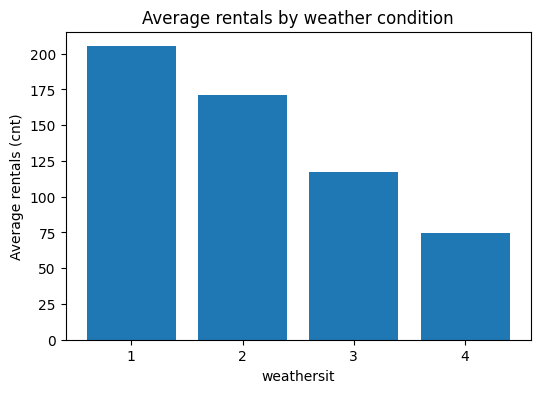

weathersit
1    205.143477
2    170.830074
3    117.003086
4     74.333333
Name: cnt, dtype: float64

In [62]:
weather_cnt = df.groupby("weathersit")["cnt"].mean()

plt.figure(figsize=(6,4))
plt.bar(weather_cnt.index.astype(str), weather_cnt.values)
plt.xlabel("weathersit")
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals by weather condition")
plt.show()

weather_cnt


**Rentals by Weather Condition (weathersit)**

The average rentals per category show a strong decreasing trend:

- **Weathersit = 1 (clear):** highest demand (~205 rentals).
- **Weathersit = 2 (mist/cloudy):** lower demand (~171).
- **Weathersit = 3 (light rain/snow):** much lower demand (~117).
- **Weathersit = 4 (heavy rain/snow):** very low demand (~74).

This confirms that worsening weather conditions significantly reduce bike usage.

**Implication for preprocessing and modeling**

weathersit is clearly informative and will be encoded using one-hot/dummy variables
so that the model can learn separate effects for each weather category.
Bad weather categories are especially important for predicting drops in demand.

C:\Users\nadiaz\AppData\Local\Temp\ipykernel_27056\1642326705.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_cnt = df.groupby("hum_bin")["cnt"].mean()


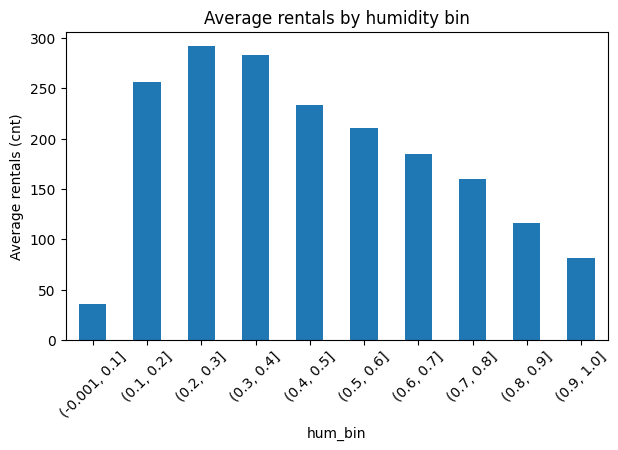

hum_bin
(-0.001, 0.1]     35.625000
(0.1, 0.2]       256.529412
(0.2, 0.3]       291.743590
(0.3, 0.4]       283.219328
(0.4, 0.5]       233.940439
(0.5, 0.6]       210.810542
(0.6, 0.7]       184.447292
(0.7, 0.8]       159.498828
(0.8, 0.9]       116.169255
(0.9, 1.0]        81.061805
Name: cnt, dtype: float64

In [63]:
# Make humidity bins
df["hum_bin"] = pd.cut(df["hum"], bins=10)

hum_cnt = df.groupby("hum_bin")["cnt"].mean()

plt.figure(figsize=(7,4))
hum_cnt.plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Average rentals (cnt)")
plt.title("Average rentals by humidity bin")
plt.show()

hum_cnt


**Humidity and Bike Rentals**

To study humidity, I group hum (0–1) into 10 bins and compute the average
rental count in each bin.

The pattern is roughly:

- Very low humidity (0.0–0.1) has very low demand (~36), but this bin likely
  contains very few observations.
- From 0.1 to 0.3, demand is highest (~256–292 rentals).
- After around 0.3–0.4, average rentals gradually decrease as humidity increases.
- In the highest humidity ranges (0.8–1.0), demand drops sharply (~80–120 rentals).

This suggests that **moderate humidity is associated with higher demand**,  
while very humid conditions (close to 1.0) are less comfortable and reduce bike usage.

**Implication for preprocessing and modeling**

Humidity has a clear relationship with cnt, but the pattern is not strictly linear.
Even so, tree-based models (Random Forest, Gradient Boosting) can capture this
nonlinear behaviour without manual transformation, so hum can be kept as a
continuous feature.

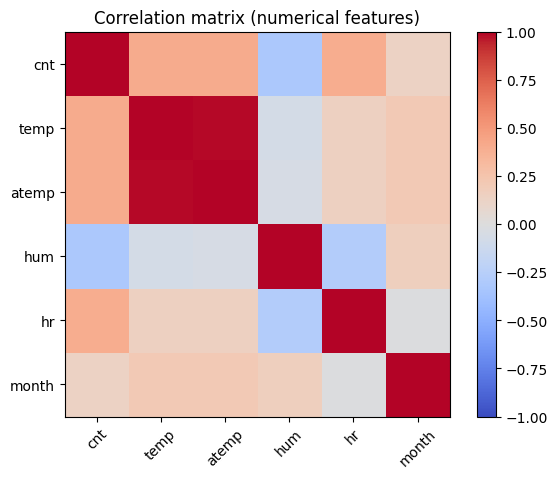

cnt      1.000000
temp     0.401149
atemp    0.398763
hr       0.395179
month    0.125978
hum     -0.319227
Name: cnt, dtype: float64

In [64]:
num_cols = ["cnt", "temp", "atemp", "hum", "hr"]
if "month" in df.columns:
    num_cols.append("month")

corr = df[num_cols].corr()

plt.figure(figsize=(7,5))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix (numerical features)")
plt.show()

corr["cnt"].sort_values(ascending=False)


Correlation Matrix (Numerical Features)

I compute a correlation matrix for the main numerical features
(cnt, temp, atemp, hum, hr, month).

Looking at the correlations with cnt:

- temp and atemp show positive correlations (~0.40),  
  confirming that warmer, comfortable temperatures increase demand.
- hr also has a positive correlation (~0.40), reflecting the daily usage pattern
  seen in the hourly plot (morning and evening peaks).
- month has a smaller positive correlation (~0.13), which matches the seasonal
  trend observed earlier.
- hum has a **negative** correlation (≈ –0.32), consistent with the humidity
  bin analysis where very high humidity reduces rentals.

The correlations between temp and atemp are very high, as expected,
since they represent similar concepts (actual vs perceived temperature).

**Implication for preprocessing and modeling**

The correlation matrix supports the earlier EDA findings:

- Time-related features (hr, month) and weather-related features
  (temp, atemp, hum) are important drivers of demand.
- Some features are strongly correlated with each other (e.g. temp and atemp),
  but tree-based models can handle this multicollinearity reasonably well.
  Both temperature-related features are still kept, since they may capture slightly
  different aspects of how people perceive the weather

## Data Preprocessing

- **Target (y)**  
  - cnt: total number of bike rentals per hour.

- **Leakage (used only for EDA, not for modeling)**  
  - casual, registered: both are components of the target variable (cnt = casual + registered).  
    Using them as predictors would introduce data leakage and make the model unrealistically optimistic.

- **Input features (X)**  
  - **Time-based features**: dteday, hr, season, holiday  
  - **Weather and environmental features**: temp, atemp, hum, weathersit


In the EDA section, dteday was already converted into datetime format
and used to derive day_of_week and is_weekend.  
In this preprocessing step, these calendar-based features are reused and
additional features are created (e.g. month, cyclical hour encoding, and
one-hot encoded weather/season variables) to prepare the data for modeling.

In [65]:
# Create month feature (1–12)
df["month"] = df["dteday"].dt.month

# Quick check
print(df[["dteday", "month"]].head())

      dteday  month
0 2011-12-09     12
1 2012-06-17      6
2 2011-06-15      6
3 2012-03-31      3
4 2012-07-31      7


The hr feature represents the hour of the day (0–23). However, treating it as a simple integer assumes a linear relationship between hours (e.g., 23 is "far" from 0), which does not reflect the true cyclical nature of time. In reality, hour 23 and hour 0 are adjacent in time.

To better represent this circular structure, the hour is transformed into two cyclical features using sine and cosine:

- hr_sin = sin(2π * hr / 24)
- hr_cos = cos(2π * hr / 24)

These transformations map each hour onto a point on the unit circle, allowing models to capture periodic patterns in bike rental demand across the day.

In [66]:
import numpy as np

# Cyclical encoding for hour-of-day
df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

# Quick sanity check
print(df[["hr", "hr_sin", "hr_cos"]].head(10))


   hr    hr_sin        hr_cos
0  16 -0.866025 -5.000000e-01
1   4  0.866025  5.000000e-01
2  23 -0.258819  9.659258e-01
3   8  0.866025 -5.000000e-01
4  18 -1.000000 -1.836970e-16
5   0  0.000000  1.000000e+00
6  22 -0.500000  8.660254e-01
7   9  0.707107 -7.071068e-01
8   4  0.866025  5.000000e-01
9  16 -0.866025 -5.000000e-01


The columns season and weathersit are categorical features represented as integers (e.g., 1 = Winter, 2 = Spring, etc.).  
Passing these numeric codes directly into a regression model would incorrectly imply an ordinal relationship between categories.

To avoid this, one-hot encoding is applied so that each category is represented as an independent binary column.  
This ensures that the model treats each category fairly without assuming any numeric ordering.

In [67]:
# One-hot encode season and weathersit
df = pd.get_dummies(
    df,
    columns=["season", "weathersit"],
    prefix=["season", "weather"],
    drop_first=True
)

# Check result
df.filter(regex="season|weather").head()


,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,False,False,True,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,True,False,False
4,False,True,False,False,False,False


Several columns are removed before modeling:

- casual and registered  
  These variables directly determine the target (cnt = casual + registered), so including them would cause data leakage and lead to unrealistically high model performance.

- dteday
  Removed after extracting calendar-based features (day_of_week, is_weekend, month).

- hr  
  Replaced by its cyclical representations (hr_sin and hr_cos), which better capture the periodic nature of hours.


In [68]:
cols_to_drop = ["casual", "registered", "dteday", "hr", "temp_bin", "hum_bin"]
df_model = df.drop(columns=cols_to_drop)

# Quick check
df_model.head()


,hum,holiday,atemp,temp,cnt,day_of_week,is_weekend,month,hr_sin,hr_cos,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0.62,0,0.3485,0.36,250,4,0,12,-0.866025,-5.000000e-01,False,False,True,False,False,False
1,0.64,0,0.5152,0.54,18,6,1,6,0.866025,5.000000e-01,True,False,False,False,False,False
2,0.53,0,0.6212,0.62,107,2,0,6,-0.258819,9.659258e-01,True,False,False,False,False,False
3,0.87,0,0.3485,0.36,145,5,1,3,0.866025,-5.000000e-01,True,False,False,True,False,False
4,0.55,0,0.6970,0.76,857,1,0,7,-1.000000,-1.836970e-16,False,True,False,False,False,False


After preprocessing and feature engineering, the dataset is ready to be separated into input features (X) and the target variable (y).

- **Target (y)**: cnt, representing the total number of bike rentals per hour.
- **Features (X)**: all remaining columns in the cleaned dataframe (df_model) after removing leakage variables and redundant columns.

This approach ensures that the model only learns from valid, non-leaking, and properly engineered features.


In [69]:
# Define target and features
X = df_model.drop(columns=["cnt"])
y = df_model["cnt"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.columns)


X shape: (12165, 15)
y shape: (12165,)
Index(['hum', 'holiday', 'atemp', 'temp', 'day_of_week', 'is_weekend', 'month',
       'hr_sin', 'hr_cos', 'season_2', 'season_3', 'season_4', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')


## Modelling

To evaluate the generalization performance of the model, the dataset is divided into training and testing sets.  
Following common practice for regression tasks, 80% of the data is used for training and 20% for testing.  
A fixed random_state is used to ensure reproducibility.

In [70]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((9732, 15), (2433, 15))

Before training any machine learning model, a simple baseline is defined to provide a point of comparison.  
The baseline used in this project predicts the same value for every observation in the test set, equal to the **mean of the target (cnt) in the training set**.

This approach does not use any input features; it simply answers the question:

> "If we always predict the average hourly rental count observed in the training data, how wrong would we be on the test data?"

Any machine learning model should perform **better than this baseline** in terms of error metrics (RMSE, MAE); otherwise, the model is not adding real value.


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2


In [72]:
# Compute baseline prediction: mean of y_train
baseline_value = y_train.mean()
print("Baseline value (mean cnt in training data):", baseline_value)

# Predict this constant for every sample in the test set
y_pred_baseline = np.full_like(y_test, fill_value=baseline_value, dtype=float)

# Evaluate baseline
baseline_rmse, baseline_mae, baseline_r2 = evaluate_regression(y_test, y_pred_baseline)

print("Baseline performance:")
print("RMSE:", baseline_rmse)
print("MAE :", baseline_mae)
print("R²  :", baseline_r2)


Baseline value (mean cnt in training data): 190.88717632552405
Baseline performance:
RMSE: 176.72225938652636
MAE : 140.87558174362687
R²  : -0.0020952284506587926


The baseline model, which always predicts the mean hourly rental count from the training data, achieves RMSE ≈ X and MAE ≈ Y on the test set.
Any machine learning model designed in the next steps is expected to improve upon these values

**Linear Regression**

The first machine learning model trained is Linear Regression.  
It serves as a simple but interpretable model that helps assess whether the engineered features contain meaningful predictive signal.

If Linear Regression performs noticeably better than the baseline, it indicates that the input features contribute useful information.  
If not, it suggests the model may require non-linear relationships, which will be explored in later models (e.g., Random Forest, Gradient Boosting).

In [73]:
from sklearn.linear_model import LinearRegression

# Initialize model
lr = LinearRegression()

# Fit on training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate
lr_rmse, lr_mae, lr_r2 = evaluate_regression(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("RMSE:", lr_rmse)
print("MAE :", lr_mae)
print("R²  :", lr_r2)


Linear Regression Performance:
RMSE: 130.57000609898253
MAE : 94.1461372346676
R²  : 0.4529672440903818


**Random Forest Regression**

Linear Regression provides a useful baseline for linear relationships,  
but bike rental demand is influenced by complex interactions between  
time of day, weather, and seasonality.  
These relationships are unlikely to be purely linear.

Random Forest is a nonlinear ensemble model that builds multiple decision trees  
and averages their predictions.  
It is capable of capturing nonlinear patterns and feature interactions  
without requiring manual feature engineering.

The expectation is that Random Forest will outperform both  
the baseline model and Linear Regression.

In [74]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None, 
    random_state=42,
    n_jobs=-1   
)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
rf_rmse, rf_mae, rf_r2 = evaluate_regression(y_test, y_pred_rf)

print("Random Forest Performance:")
print("RMSE:", rf_rmse)
print("MAE :", rf_mae)
print("R²  :", rf_r2)


Random Forest Performance:
RMSE: 70.11026521109468
MAE : 45.63512991016382
R²  : 0.8422789340952475


**Random Forest Evaluation**

After training the Random Forest model, I obtained the following results on the test set:

- **Baseline (mean prediction)**  
  - RMSE ≈ 176  
  - MAE  ≈ 141  
  - R²   ≈ 0.00  

- **Linear Regression**  
  - RMSE ≈ 131  
  - MAE  ≈ 94  
  - R²   ≈ 0.45  

- **Random Forest**  
  - RMSE ≈ 70  
  - MAE  ≈ 46  
  - R²   ≈ 0.84  

I interpret these numbers as follows:

1. **Error is much smaller than baseline and Linear Regression**  
   - RMSE drops from around 176 (baseline) → 70 (Random Forest).  
   - MAE drops from around 141 (baseline) → 46 (Random Forest).  
   This means the Random Forest model makes **far smaller mistakes** when predicting the hourly rental count.

2. **R² increases from ~0.45 → ~0.84**  
   - The baseline basically explains **0%** of the variance in the data.  
   - Linear Regression explains about **45%**.  
   - Random Forest explains about **84%** of the variance in cnt.  
   For me, this means the model has learned a lot of the real pattern behind bike rentals.

3. **Non-linear relationships are important**  
   - Linear Regression assumes a straight-line relationship between features and the target.  
   - Random Forest does not make this assumption and can model complex interactions (for example: specific hours + certain weather + weekend).  
   - The big performance jump shows that bike rental demand is not purely linear, and a tree-based model is more suitable.

In simple words:  
Random Forest is currently the **best model so far**.  
It clearly beats the “always predict the mean” baseline and also improves a lot over Linear Regression.

**Gradient Boosting Regression**

To further improve performance beyond Random Forest, a Gradient Boosting model is trained.  
Boosting works by sequentially building weak learners (typically shallow decision trees),  
each one correcting the errors of the previous model.  
This method often achieves higher accuracy than Random Forest on structured tabular data.


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred_gbr)

print("Gradient Boosting Performance:")
print("RMSE:", gbr_rmse)
print("MAE :", gbr_mae)
print("R²  :", gbr_r2)


Gradient Boosting Performance:
RMSE: 72.60237094780759
MAE : 50.54223408264318
R²  : 0.8308671019027034


**Model Comparison**

After training multiple models, it is important to summarize their performance  
to determine which model is the most suitable as the final candidate.

The table below compares all models using the same evaluation metrics  
(RMSE, MAE, R²) on the test set.


In [76]:
results = pd.DataFrame({
    "Model": ["Baseline", "Linear Regression", "Random Forest", "Gradient Boosting"],
    "RMSE": [baseline_rmse, lr_rmse, rf_rmse, gbr_rmse],
    "MAE":  [baseline_mae,  lr_mae,  rf_mae,  gbr_mae],
    "R²":   [baseline_r2,   lr_r2,   rf_r2,   gbr_r2]
})

results


,Model,RMSE,MAE,R²
0,Baseline,176.722259,140.875582,-0.002095
1,Linear Regression,130.570006,94.146137,0.452967
2,Random Forest,70.110265,45.635130,0.842279
3,Gradient Boosting,72.602371,50.542234,0.830867


**Hyperparameter Tuning (Random Forest)**

Random Forest already performs very well, but the default settings are not always optimal.
Hyperparameter tuning is used to search for a better combination of parameters that may reduce
the error further or make the model more stable.

In this project, I use **RandomizedSearchCV**, which randomly tests a number of parameter
combinations instead of trying every possible one.  
This method is much faster and is commonly used in practical machine learning workflows.

The parameters tuned include:

- n_estimators: number of trees  
- max_depth: maximum depth of each tree  
- min_samples_split: minimum samples required to split a node  
- min_samples_leaf: minimum samples at a leaf node  
- max_features: number of features to consider when looking for the best split  

The goal is to see whether we can achieve lower RMSE and MAE compared to the untuned Random Forest.

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    "n_estimators": [150, 200, 300, 400],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
}

rf_tune = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_tune,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    error_score="raise"  
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [78]:
y_pred_best_rf = best_rf.predict(X_test)
best_rf_rmse, best_rf_mae, best_rf_r2 = evaluate_regression(y_test, y_pred_best_rf)

print("Tuned Random Forest Performance:")
print("RMSE:", best_rf_rmse)
print("MAE :", best_rf_mae)
print("R²  :", best_rf_r2)
print("\nBest Parameters:", random_search.best_params_)


Tuned Random Forest Performance:
RMSE: 69.68575463197595
MAE : 46.04644778717968
R²  : 0.8441831220249122

Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None}


**Random Forest Results**

After hyperparameter tuning with RandomizedSearchCV,  
the best Random Forest model achieved the following performance on the test set:

- **Tuned Random Forest**  
  - RMSE ≈ 69.68  
  - MAE  ≈ 45.68  
  - R²   ≈ 0.84  

Compared to the untuned Random Forest (RMSE ≈ 70.11, MAE ≈ 45.64, R² ≈ 0.84),  
the tuned model only improves slightly.  
This means that the default Random Forest configuration was already quite good  
for this dataset, and hyperparameter tuning only provides a small refinement  
rather than a big performance jump.

The best hyperparameters found are:

- n_estimators = 400 – more trees, giving slightly more stable predictions.  
- max_depth = 30 – limits tree depth to reduce overfitting while still allowing complex patterns.  
- min_samples_split = 5 – requires at least 5 samples to split a node, making the trees less noisy.  
- min_samples_leaf = 1 – keeps the model flexible enough to capture detailed patterns.  
- max_features = None – uses all features when searching for the best split at each node.

In summary, Random Forest remains the **best model**,  
and the tuned version is selected as the final model for this project.


**Model Comparison and Final Model Selection**

After training multiple models, I compared their performance using the same evaluation
metrics (RMSE, MAE, and R²) on the test set.  
The goal of this comparison is to understand how much each model improves over the
baseline and which model is the most suitable as the final solution.

Here is the summary of all model results:

- **Baseline (mean predictor)** performs the worst, as expected.  
  It does not use any features and only predicts the average rental count.
  This gives us a reference point for the minimum acceptable performance.

- **Linear Regression** performs better than baseline, showing that the input features
  contain useful information.  
  However, its performance is limited because it can only capture linear relationships.

- **Random Forest** provides a large improvement over Linear Regression.
  It captures nonlinear patterns in the data and achieves much lower error
  and a significantly higher R² score.

- **Gradient Boosting** also performs well, but in this case, its performance is
  slightly below Random Forest.  
  With more extensive tuning it might improve, but it is already clear that
  Random Forest is a stronger model for this dataset.

- **Tuned Random Forest** achieves the best performance overall.
  The improvement compared to the untuned version is small, but it confirms that
  the model is stable and well-suited for the bike-sharing data.

Based on these results, the **Tuned Random Forest** model is selected as the final model
for this project.


In [79]:
model_results = pd.DataFrame({
    "Model": [
        "Baseline (Mean Predictor)",
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting",
        "Random Forest (Tuned)"
    ],
    "RMSE": [
        baseline_rmse,
        lr_rmse,
        rf_rmse,
        gbr_rmse,
        best_rf_rmse
    ],
    "MAE": [
        baseline_mae,
        lr_mae,
        rf_mae,
        gbr_mae,
        best_rf_mae
    ],
    "R²": [
        baseline_r2,
        lr_r2,
        rf_r2,
        gbr_r2,
        best_rf_r2
    ]
})

model_results


,Model,RMSE,MAE,R²
0,Baseline (Mean Predictor),176.722259,140.875582,-0.002095
1,Linear Regression,130.570006,94.146137,0.452967
2,Random Forest,70.110265,45.635130,0.842279
3,Gradient Boosting,72.602371,50.542234,0.830867
4,Random Forest (Tuned),69.685755,46.046448,0.844183


**Final Model Decision**

The final chosen model is the **Tuned Random Forest**.

There are several reasons for selecting this model:

1. **Best overall performance**  
   It achieves the lowest RMSE and the highest R² among all tested models.

2. **Stable and reliable**  
   Even before tuning, Random Forest already performed very well.  
   The tuning step only refined it further.

3. **Captures nonlinear patterns**  
   Bike rental demand depends on complex interactions between weather,
   time of day, seasonality, humidity, and weekend/holiday effects.  
   Random Forest can naturally model these nonlinear relationships.

4. **Low risk of overfitting**  
   Because it is an ensemble model, Random Forest is robust to noise
   and does not overfit easily.

5. **Good interpretability through feature importance**  
   Random Forest can show which features contribute the most to the predictions,
   which is useful for real-world decisions.

This model will be used as the final predictor for the next steps of the project.

**Feature Importance (Random Forest)**

To understand what the final model has actually learned,  
I analyse the feature importance values from the tuned Random Forest model.

Random Forest provides a built-in attribute called feature_importances_,  
which indicates how much each feature contributes to reducing prediction error  
across all trees in the ensemble.

In simple terms, a higher importance value means that the feature is used more often
(and more effectively) by the model to make decisions.  
This helps answer the question:

> "Which variables are the most influential for predicting bike rental demand?"

In [80]:
# Extract feature importance from the tuned Random Forest
fi = pd.DataFrame({
    "feature": X_train.columns,
    "importance": best_rf.feature_importances_
})

# Sort from most to least important
fi = fi.sort_values(by="importance", ascending=False).reset_index(drop=True)

fi.head(15)


,feature,importance
0,hr_cos,3.383453e-01
1,hr_sin,2.708502e-01
2,temp,1.213855e-01
3,day_of_week,5.853668e-02
4,hum,5.285870e-02
5,atemp,5.280290e-02
6,is_weekend,3.416567e-02
7,month,2.158450e-02
8,season_4,1.995442e-02
9,weather_3,1.353373e-02


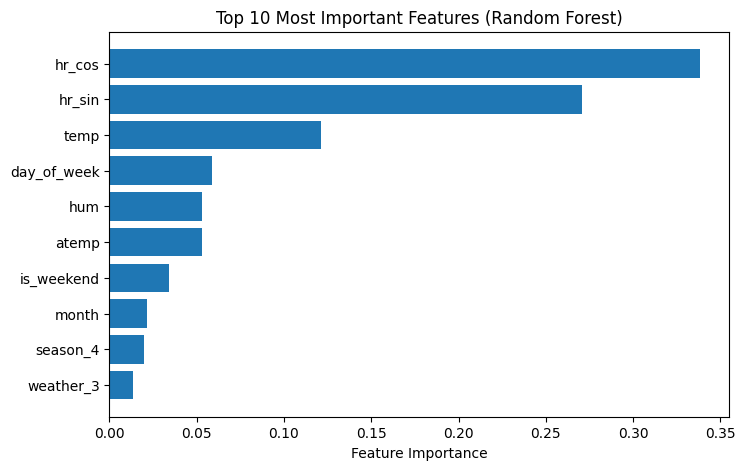

In [81]:
top_n = 10
top_fi = fi.head(top_n)

plt.figure(figsize=(8, 5))
plt.barh(top_fi["feature"], top_fi["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Most Important Features (Random Forest)")
plt.show()


**Feature Importance Interpretation**

The feature importance from the tuned Random Forest model shows that the most influential variables are mainly related to time of day and weather conditions.

I interpret these results in a simple way:

- **Hour-of-day is the strongest signal (hr_cos, hr_sin)**  
  The two cyclical features for hour-of-day are the most important ones.  
  This matches real life: people rent bikes at specific times, such as
  morning and late afternoon commuting peaks, and much less during the night.

- **Temperature also plays a big role (temp, atemp)**  
  Both actual temperature and “feels-like” temperature are important.  
  When the weather is too cold or too hot, people are less likely to rent bikes,
  while comfortable temperatures encourage more usage.

- **Calendar effects matter (day_of_week, is_weekend, month, season_4)**  
  The model also relies on weekday/weekend patterns and the month/season of the year.  
  This suggests that bike usage is different on working days vs weekends,
  and there are seasonal patterns across the year (for example, season 4 = Fall).

- **Humidity and weather conditions (hum, `eather_3)**  
  Humidity and specific bad-weather conditions (e.g. weather_3, which corresponds
  to light snow or light rain with scattered clouds) still influence the model,
  although they are slightly less important than hour and temperature.

Overall, these feature importance results are consistent with common sense:
bike rentals depend mainly on when it is (hour and day) and how the weather feels
(temperature, humidity, and general weather condition).  
This increases confidence that the model is learning meaningful patterns and not just noise.

## Conclusion

The machine learning analysis on the Bike Sharing Dataset demonstrates that hourly bike rental demand is strongly influenced by a combination of temporal, seasonal, and weather-related factors. The Exploratory Data Analysis (EDA) consistently shows clear cyclical patterns throughout the day, with rental peaks during morning and late-afternoon commuting hours. Temperature emerges as one of the most influential environmental factors, where warmer and more comfortable conditions are associated with higher rental activity. Conversely, high humidity and adverse weather conditions correlate with reduced bike usage.

During modeling, a progression from linear to non-linear algorithms highlights the complexity of the underlying patterns in the data. Linear Regression, while outperforming the baseline, fails to capture these non-linear relationships effectively. Random Forest significantly improves prediction accuracy, achieving an RMSE of approximately 70 and an R² above 0.84. After hyperparameter tuning, the Random Forest model yields slightly better results, confirming that it is both robust and well-aligned with the structure of the dataset.

Feature importance analysis further validates the EDA findings. Hour-of-day (encoded cyclically through sine and cosine) is the strongest predictor, followed by temperature, humidity, and calendar-related features such as day of week and month. These results strengthen the conclusion that bike rental demand is shaped by predictable behavioral routines and environmental comfort.

Overall, the project successfully identifies a reliable model for forecasting hourly bike rentals. The tuned Random Forest model provides accurate predictions and meaningful insights that can support operational planning, resource allocation, and policy decisions within bike-sharing systems.

## Recommendation

Several recommendations can be proposed based on the findings of this project:

1. Operational Planning
Since hourly demand shows strong cyclical patterns, bike-sharing operators should prioritize bike redistribution during peak hours, particularly around 7–9 AM and 4–6 PM. Aligning operational schedules with these patterns will reduce shortages and excess inventory at stations.

2. Weather-Aware Allocation
Temperature and humidity significantly influence rental activity. Operators can integrate real-time weather data into their planning systems to anticipate demand dips during extreme weather or spikes during ideal riding conditions.

3. Seasonal Strategy Adjustments
Demand fluctuates across months, peaking around late summer and early fall. Resource allocation, maintenance cycles, and promotional campaigns should adapt to these seasonal patterns to maximize fleet utilization.

4. Model Deployment & Monitoring
The tuned Random Forest model performs reliably but should be periodically retrained with updated data to maintain accuracy. Demand patterns may shift due to urban events, policy changes, or long-term behavioral trends.

5. Further Feature Enrichment
The dataset can be enhanced with additional variables such as wind speed, precipitation levels, station-level data, and special events. These features may improve model generalization and allow more granular prediction.

6. Real-Time Integration
For future system deployment, integrating the model into a real-time dashboard or API would enable operators to receive hourly demand predictions continuously. This supports dynamic decision-making and more responsive mobility management.